In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from pydmd import HODMD
from pydmd.plotter import plot_eigs

In [6]:
import scipy.io.wavfile as wav

samplerate, data = wav.read("./the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/9979_AV.wav")

4000
72640


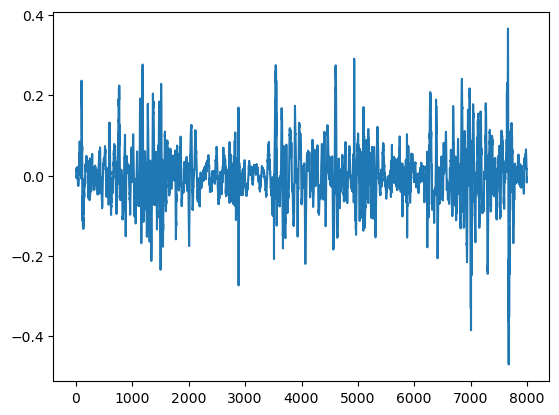

In [10]:
print(samplerate)
print(len(data))
datamax = max(data)
data = data/datamax
plt.plot(data[12000:20000])

In [4]:
from numpy.fft import *

def filter_signal(signal, threshold=1e6):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [5]:
filtered = filter_signal(data)

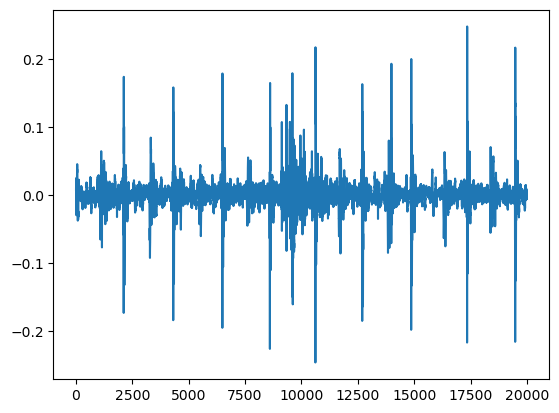

In [6]:
plt.plot(filtered[:20000])

In [7]:
import emd

<Axes: xlabel='Time (samples)'>

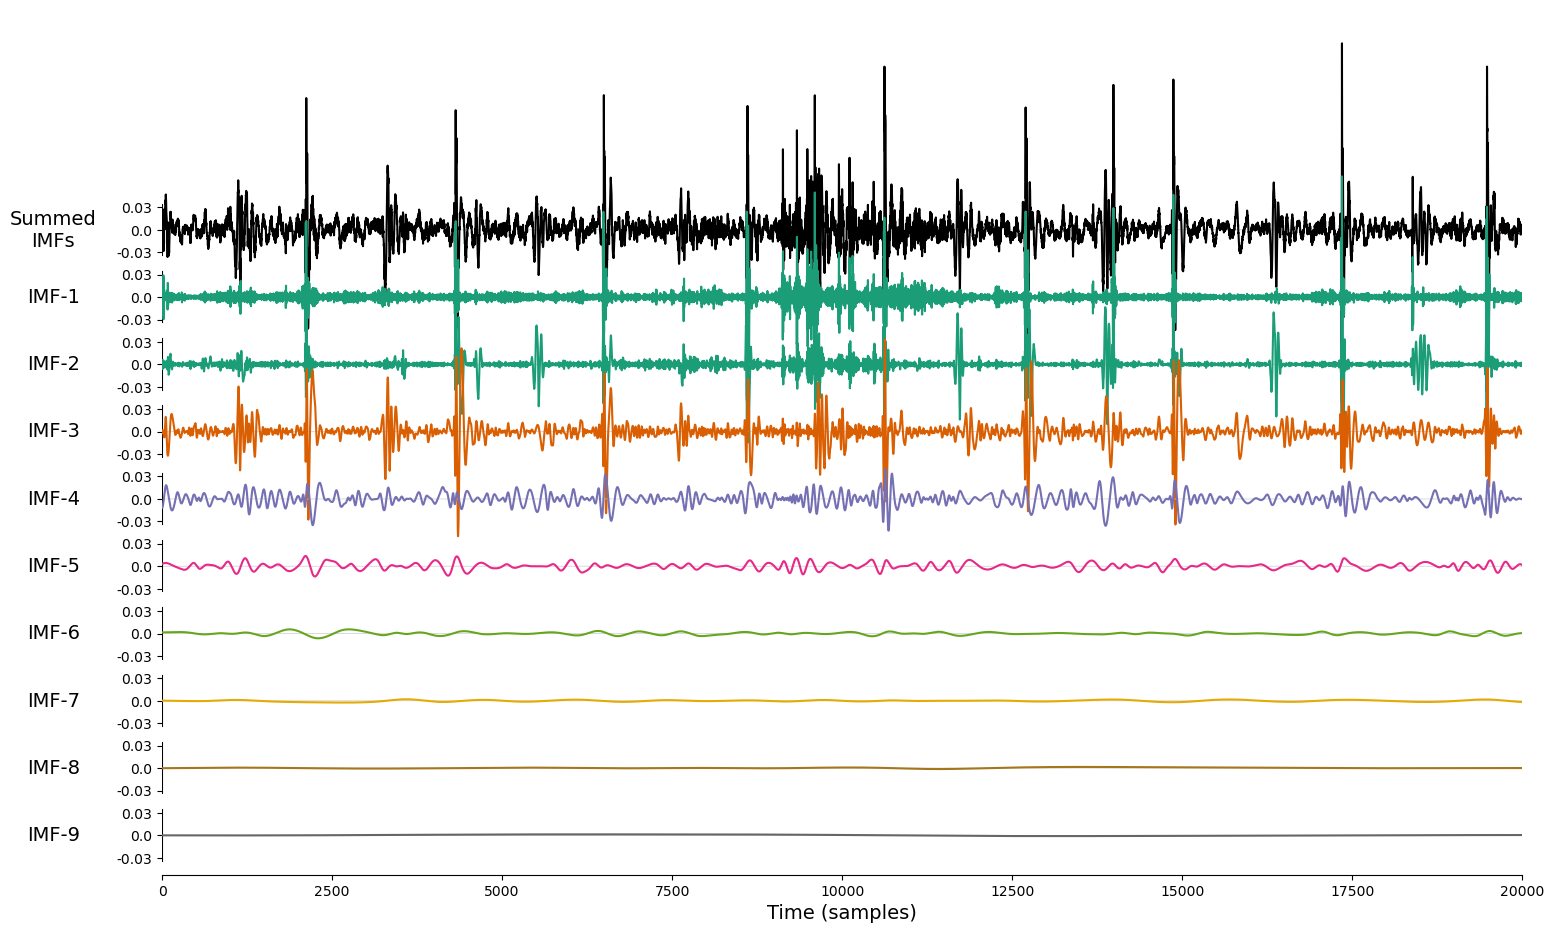

In [8]:
imf = emd.sift.sift(filtered[:20000])
emd.plotting.plot_imfs(imf)

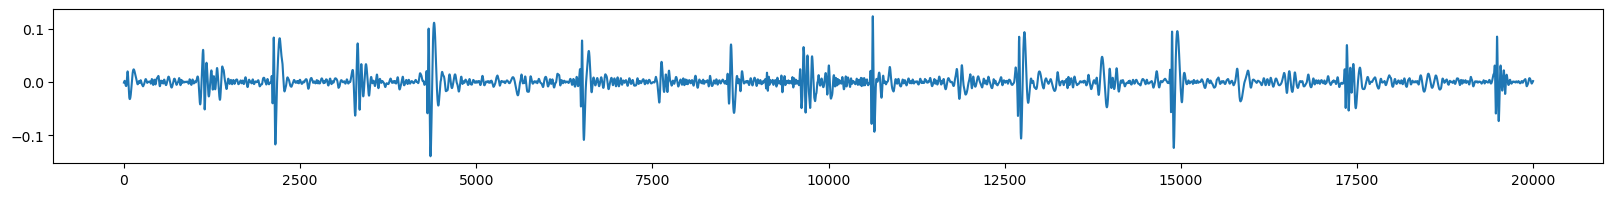

In [12]:
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.plot(imf.transpose()[2])